In [11]:
from IPython.display import Image
Image(url="PANDAS-CLEANING/tugas_pekan2.png", width=1000, height=400)

# 1. Import Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("PANDAS-CLEANING/data/SoalTugas2.csv")

In [37]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# 2. Analisis Kategorik atau Numerik

## Analisis Ketogorik

In [38]:
df.clock_speed.min()

0.5

In [39]:
df.clock_speed.max()

3.0

In [40]:
df["kecepatan"]=pd.cut(df.clock_speed,bins=[0,0.5,1.5,3],labels=['lambat', 'normal', 'cepat'])

In [41]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class,kecepatan
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,0,cepat
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,1,lambat
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,1,lambat
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,1,cepat
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,lambat
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,1,cepat
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,1,normal
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,normal


In [82]:
df_histogram=df.groupby('kecepatan').count()['clock_speed'].reset_index()
df_histogram

,kecepatan,clock_speed
0,lambat,413
1,normal,627
2,cepat,960


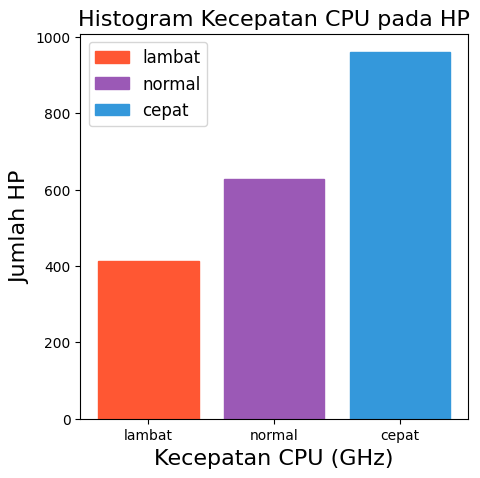

In [95]:
plt.figure(figsize=(5,5))
bar=plt.bar(df_histogram['kecepatan'], df_histogram['clock_speed'], color='#444444')


colors = ['#FF5733', '#9B59B6', '#3498DB', '#F1C40F', '#E67E22', '#2ECC71', '#1ABC9C', '#E74C3C', '#34495E', '#95A5A6']

for i in range(len(bar)):
    bar[i].set_color(colors[i % len(colors)])
    
plt.xlabel('Kecepatan CPU (GHz)', fontsize=16)
plt.ylabel('Jumlah HP',fontsize=16)
plt.title('Histogram Kecepatan CPU pada HP',fontsize=16)
plt.legend(bar, df_histogram['kecepatan'], fontsize=12)
plt.show()

##### Dari gambar di atas dapat kita simpulkan bahwa jumlah handphone dengan kecepatan CPU (GHz) dengan kategori cepat lebih banyak dengan jumlah 960 Handphone, kategori normal dengan jumlah sedang yaitu sebanyak 627 Handphone, dan kategori lambat berada pada urutan paling bawah dengan nilai 413 Handphone.

## Analisis Numerik

In [123]:
df_stacked=df.groupby('kecepatan').mean().reset_index()
df_stacked[['kecepatan','n_cores','clock_speed']]

#plt.figure(figsize=(10,10))
#width = 0.35
#bar1 = plt.bar(df_stacked['kecepatan'], df_stacked['clock_speed'], width, label='Clock Speed', color='#539165')
#bar2 = plt.bar(df_stacked['kecepatan'], df_stacked['n_cores'], width, label='Number of Cores', color='#F7C04A')
#plt.legend()
#plt.bar_label(bar1)
#plt.bar_label(bar2)
#plt.title('Grafik Perbandingan Clock Speed dan Number of Cores pada Data Penjualan Handphone')

,kecepatan,n_cores,clock_speed
0,lambat,4.593220,0.500000
1,normal,4.505582,1.051037
2,cepat,4.498958,2.269792


Text(0.5, 1.0, 'Grafik Perbandingan Clock Speed dan Number of Cores pada Data Penjualan Handphone')

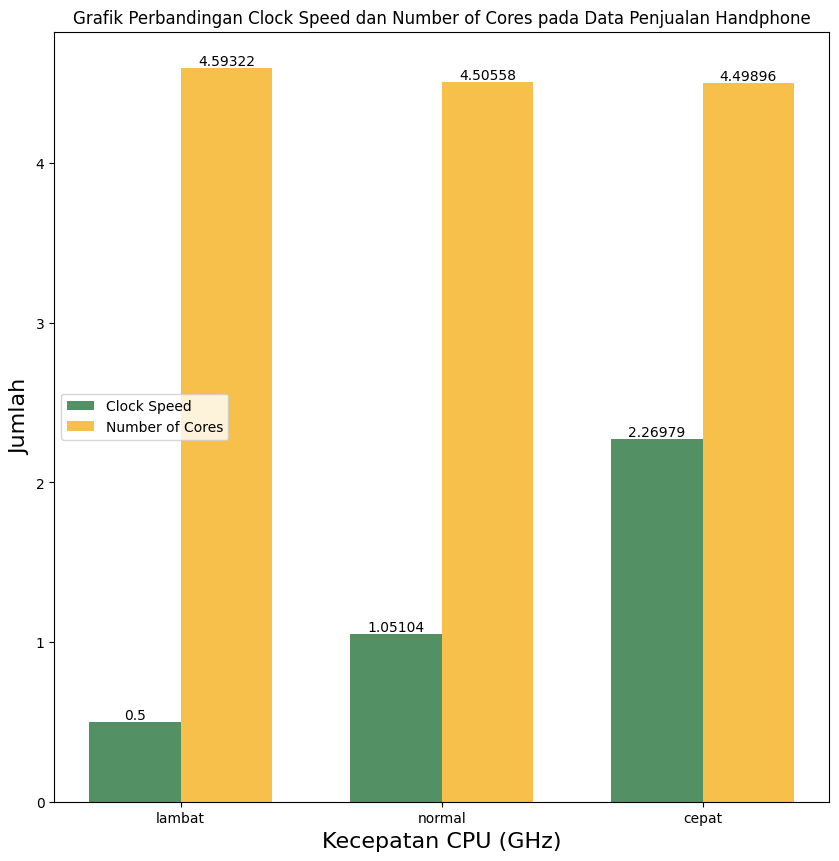

In [141]:
plt.figure(figsize=(10,10))

x = np.arange(len(df_stacked['kecepatan']))  # the label locations
width = 0.35  # the width of the bars


bar1 = plt.bar(x - width/2, df_stacked['clock_speed'], width, label='Clock Speed',color='#539165')
bar2 = plt.bar(x + width/2, df_stacked['n_cores'],width,label='Number of Cores',color='#F7C04A')
# plt.xlabel(["a"])
plt.xticks(x, ['lambat', 'normal', 'cepat'])
plt.legend()
plt.legend(loc='center left')
plt.bar_label(bar1)
plt.bar_label(bar2)
plt.xlabel('Kecepatan CPU (GHz)', fontsize=16)
plt.ylabel('Jumlah',fontsize=16)
plt.title('Grafik Perbandingan Clock Speed dan Number of Cores pada Data Penjualan Handphone')

##### Dari gambar di atas dapat kita simpulkan bahwa jumlah core tidak terlalu berpengaruh terhadap nilai clock speed

# 3. Korelasi Antar Variable dengan Visualisasi Data Seaborn

<Axes: >

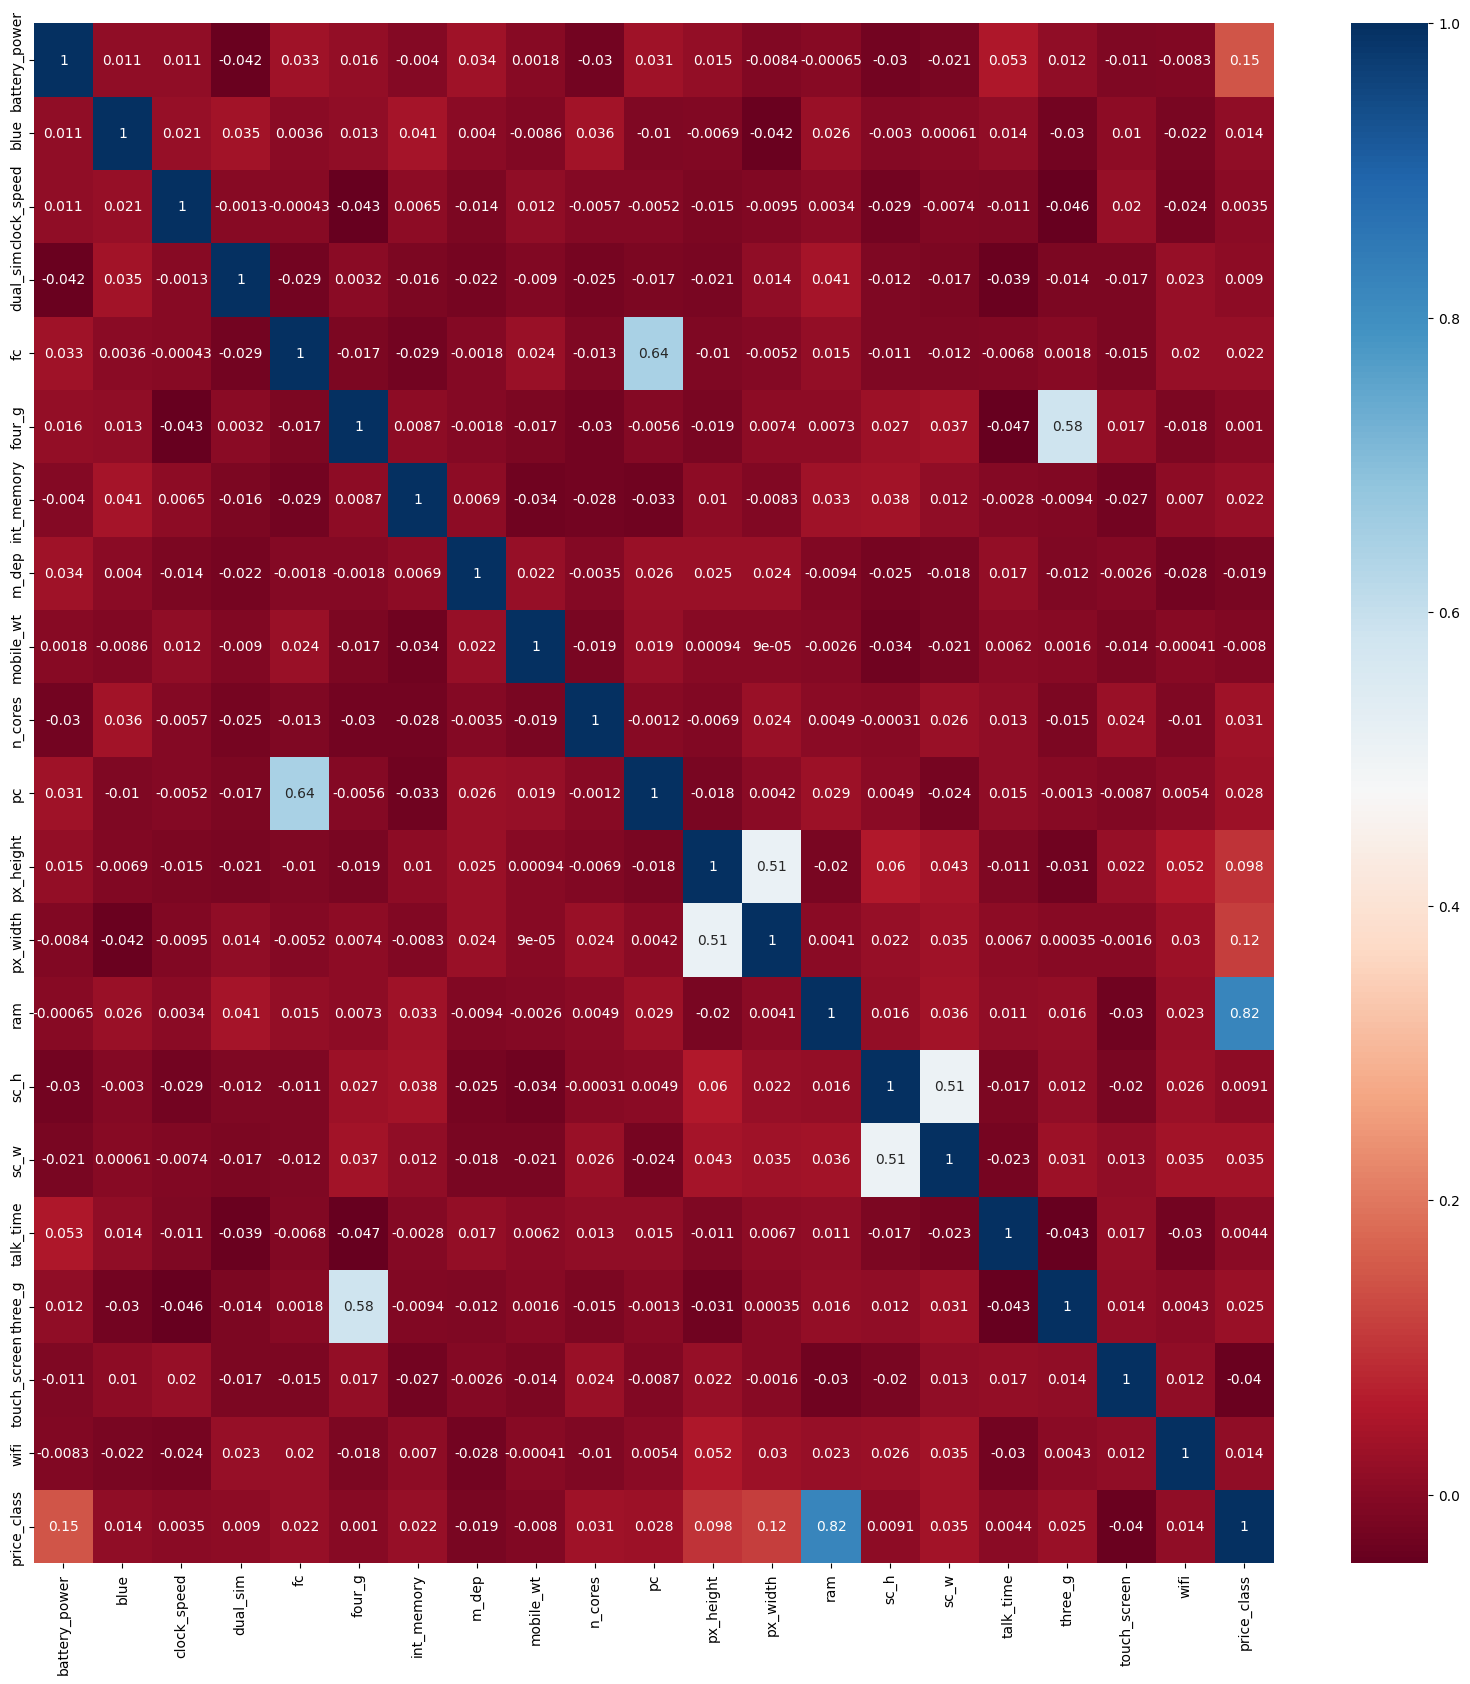

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', annot_kws={'fontsize':10})

##### Dari Visualisasi Data di atas dengan Menggunakan Seaborn kita dapat melihat korelasi antar variable dengan lebih jelas dikarenakan adanya gradasi warna yang mewakili dari angka 0 s/d 1 kemudian colormap 'RdBu' untuk menampilkan nilai positif dengan warna biru dan nilai negatif dengan warna merah. Berikut beberapa insight dari hasil korelasi antar variable dengan menggunakan visualisasi data seaborn:

1. Dimana semakin besar nilai RAM maka harga HP tersebut semakin Mahal hal ini ditunjukan
2. Dimana semakin besar nilai Lebar HP (sc_w) maka biasanya semakin besar nilai Tinggi HP (sc_h)
3. Dimana semakin besar nilai Resolusi Lebar Layar HP (px_width) maka biasanya semakin besar nilai Resolusi Tinggi Layar HP (px_heigth)
4. Dimana jika pada HP tersebut terdapat support 3G maka biasanya juga support 4G atau sebaliknya
5. Dimana semakin besar nilai Resolusi Kamera Utama (pc) maka biasanya akan semakin besar nilai Resolusi Kamera Depan (fc)

# 4. Analisis Regresi

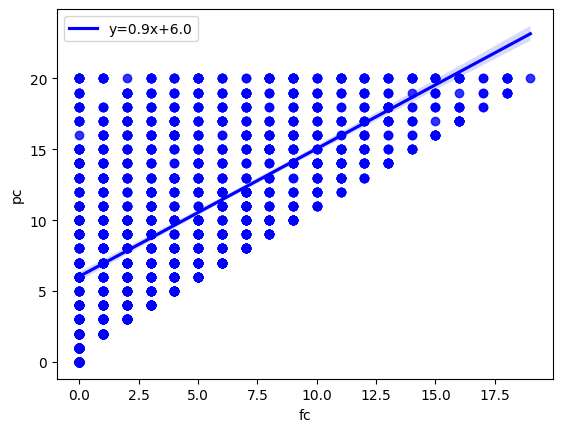

In [171]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['fc'],df['pc'])
ax = sns.regplot(x="fc", y="pc", data=df, color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

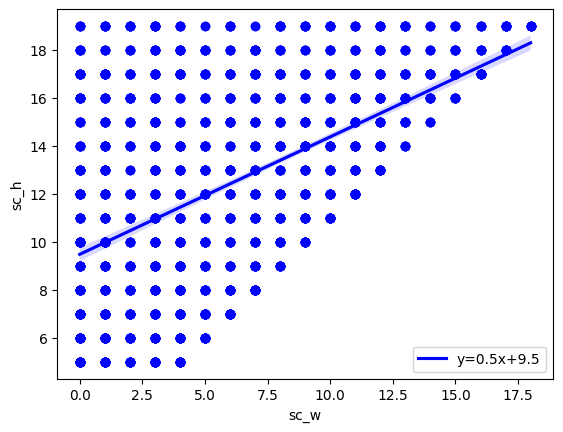

In [173]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sc_w'],df['sc_h'])
ax = sns.regplot(x="sc_w", y="sc_h", data=df, color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

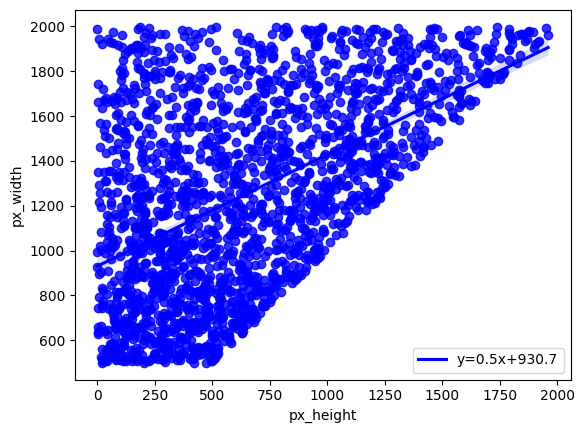

In [174]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['px_height'],df['px_width'])
ax = sns.regplot(x="px_height", y="px_width", data=df, color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

##### Kesimpulan Hasil Analisa
Analisis regresi hanya dapat dilakukan pada variabel data numerik dan numerik
1. semakin besar resolusi kamera depan maka semakin besar juga resolusi kamera utama.
2. semakin lebar layar handphone tersebut makan semakin tinggi pula layar handphone tersebut.
2. semakin besar resolusi lebar layar handphone tersebut makan semakin tinggi pula resolusi tinggi layar handphone tersebut.

# 5. Analisis Distribusi Normal

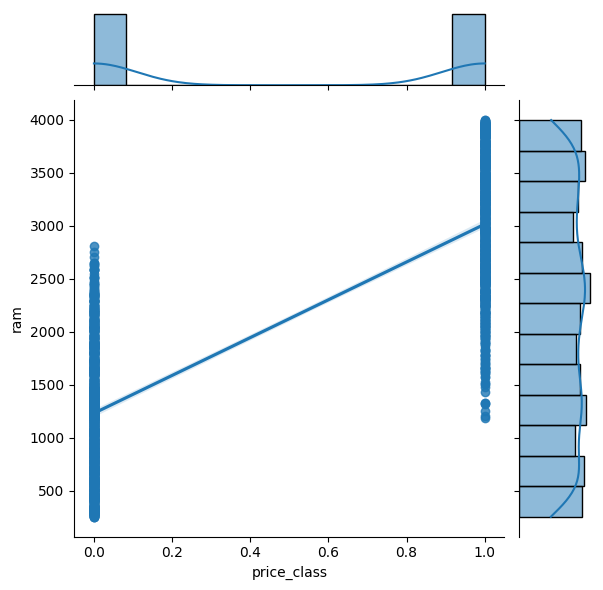

In [176]:
sns.jointplot(x='price_class',y="ram", data=df, kind='reg')

##### Dari grafik di atas dapat kita simpulkan bahwa ram terdistribusi normal

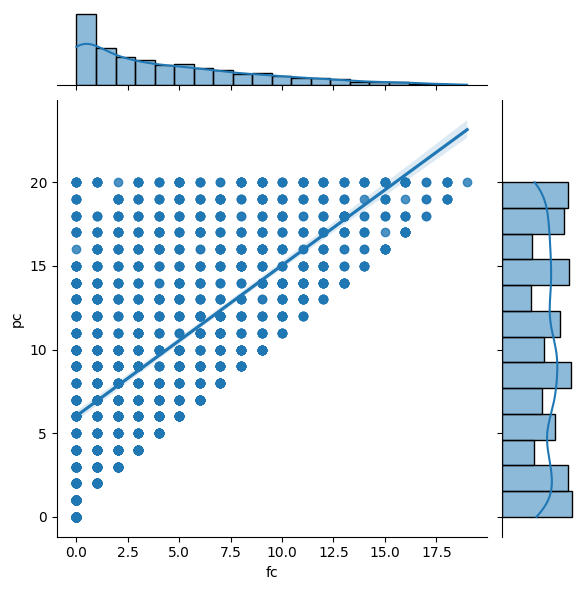

In [183]:
sns.jointplot(x='fc',y="pc", data=df, kind='reg')

##### Dari grafik di atas dapat kita simpulkan bahwa data fc tidak terdistribusi normal dan pc terdistribusi normal

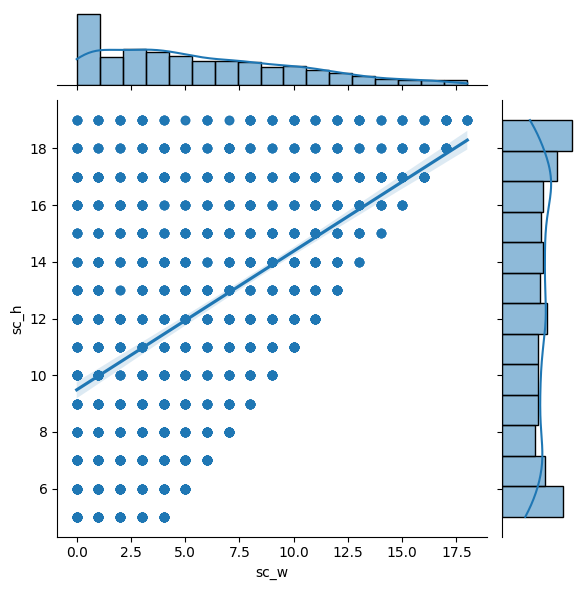

In [185]:
sns.jointplot(x='sc_w',y="sc_h", data=df, kind='reg')

##### Dari grafik di atas dapat kita simpulkan bahwa data sc_w tidak terdistribusi normal dan sc_h terdistribusi normal